<a href="https://colab.research.google.com/github/Raushaan/CODSOFT/blob/main/cd_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
credit_data = pd.read_csv("/content/creditcard.csv")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37717,39076,1.117749,-1.544665,-0.145357,-1.307482,-1.392833,-0.630833,-0.563659,-0.038716,-2.173892,...,-0.334155,-1.108220,0.070461,0.115485,0.078726,-0.460844,-0.029143,0.029028,183.19,0.0
37718,39076,0.758729,-0.483875,0.125488,1.449159,-0.639231,-0.805011,0.406994,-0.221212,0.068777,...,0.210712,0.063091,-0.316636,0.394472,0.558720,-0.304812,-0.033008,0.063331,250.00,0.0
37719,39076,-0.474907,0.835804,0.075878,-1.251283,2.492736,3.385419,0.169507,0.934749,-0.584224,...,-0.270398,-0.866353,-0.085720,0.986274,-0.082934,0.084198,0.310936,0.170342,1.49,0.0
37720,39077,-2.682780,-2.028562,1.745223,-1.157952,-0.143692,-0.807503,-1.154141,0.436917,-0.293442,...,0.353396,0.968145,-0.776459,0.182662,-0.000427,-0.209058,0.256991,-0.585781,102.00,0.0
37721,39077,1.106292,-0.525727,0.926440,0.817696,-1.122177,-0.062703,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
credit_data.shape

(37722, 31)

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37722 entries, 0 to 37721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37722 non-null  int64  
 1   V1      37722 non-null  float64
 2   V2      37722 non-null  float64
 3   V3      37722 non-null  float64
 4   V4      37722 non-null  float64
 5   V5      37722 non-null  float64
 6   V6      37722 non-null  float64
 7   V7      37721 non-null  float64
 8   V8      37721 non-null  float64
 9   V9      37721 non-null  float64
 10  V10     37721 non-null  float64
 11  V11     37721 non-null  float64
 12  V12     37721 non-null  float64
 13  V13     37721 non-null  float64
 14  V14     37721 non-null  float64
 15  V15     37721 non-null  float64
 16  V16     37721 non-null  float64
 17  V17     37721 non-null  float64
 18  V18     37721 non-null  float64
 19  V19     37721 non-null  float64
 20  V20     37721 non-null  float64
 21  V21     37721 non-null  float64
 22

In [7]:
# Check null values
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37721.000000,37721.000000,37721.000000,...,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000
mean,24766.905519,-0.207438,0.060003,0.717371,0.192425,-0.223913,0.099322,-0.113878,0.036184,0.234569,...,-0.030242,-0.112267,-0.041283,0.006498,0.136187,0.021816,0.009257,0.003928,86.029572,0.002731
std,12527.587139,1.826290,1.542122,1.518753,1.404199,1.379541,1.306858,1.250118,1.229029,1.230965,...,0.760639,0.639297,0.550248,0.593787,0.435848,0.505541,0.386284,0.299030,232.994577,0.052184
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,13890.000000,-0.962070,-0.514064,0.239253,-0.715389,-0.827569,-0.639691,-0.595964,-0.154250,-0.543033,...,-0.238364,-0.535135,-0.178672,-0.327777,-0.127541,-0.331097,-0.063228,-0.007002,7.190000,0.000000
50%,29826.000000,-0.231670,0.107303,0.822135,0.188408,-0.262141,-0.159274,-0.073638,0.045764,0.108784,...,-0.079107,-0.085964,-0.052248,0.061264,0.176033,-0.064077,0.008660,0.021275,22.820000,0.000000
75%,34937.750000,1.161603,0.748540,1.451850,1.073459,0.300384,0.486727,0.434617,0.310800,0.960733,...,0.098007,0.298240,0.076458,0.398894,0.421271,0.301099,0.085603,0.075752,77.750000,0.000000
max,39077.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [9]:
# Number of columns
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Unique value in class columns
credit_data.Class.unique()

array([ 0.,  1., nan])

In [11]:
fraud_case = credit_data[credit_data['Class'] == 1]
valid_case = credit_data[credit_data['Class'] == 0]

print(f"Number of Fraud Case: {len(fraud_case)}")
print(f"Number of Valid Case: {len(valid_case)}")

total =  len(fraud_case) / len(valid_case)
total


Number of Fraud Case: 103
Number of Valid Case: 37618


0.0027380509330639587

In [12]:
per = len(fraud_case) / len(credit_data['Class']) * 100
per

0.27305020942685965

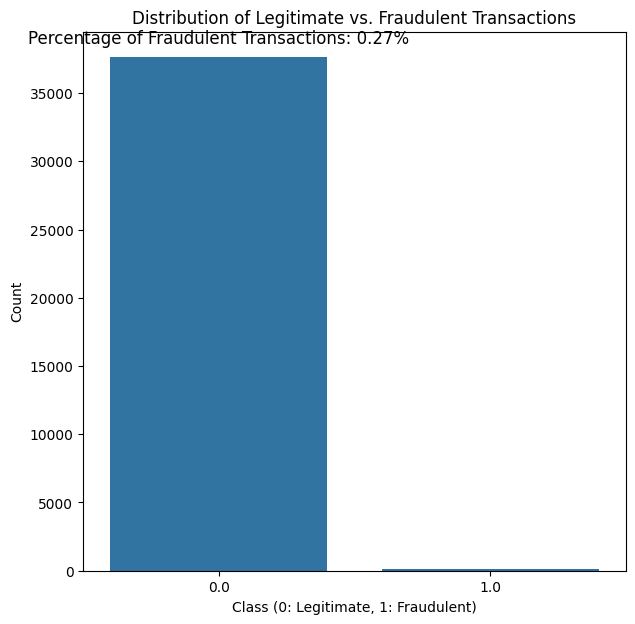

In [17]:
# Count the number of occurrences for each class (0 for legitimate, 1 for fraudulent)
class_counts = credit_data['Class'].value_counts()

# Calculate the percentage of fraudulent transactions
percentage_fraudulent = (class_counts[1] / class_counts.sum()) * 100

plt.figure(figsize=(7, 7))
sns.countplot(x='Class', data=credit_data)
plt.title('Distribution of Legitimate vs. Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')

# Display the percentage of fraudulent transactions on the plot
plt.text(0, class_counts[0] + 1000, f'Percentage of Fraudulent Transactions: {percentage_fraudulent:.2f}%', fontsize=12, ha='center')

plt.show()

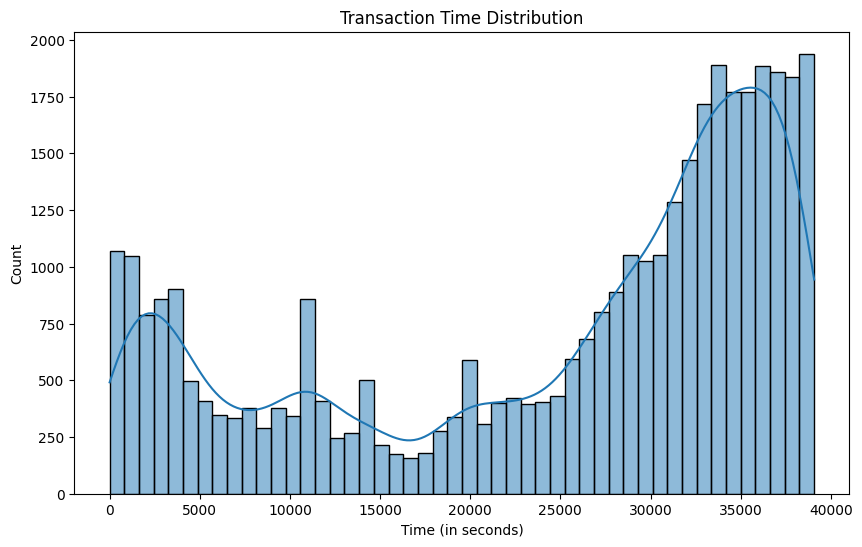

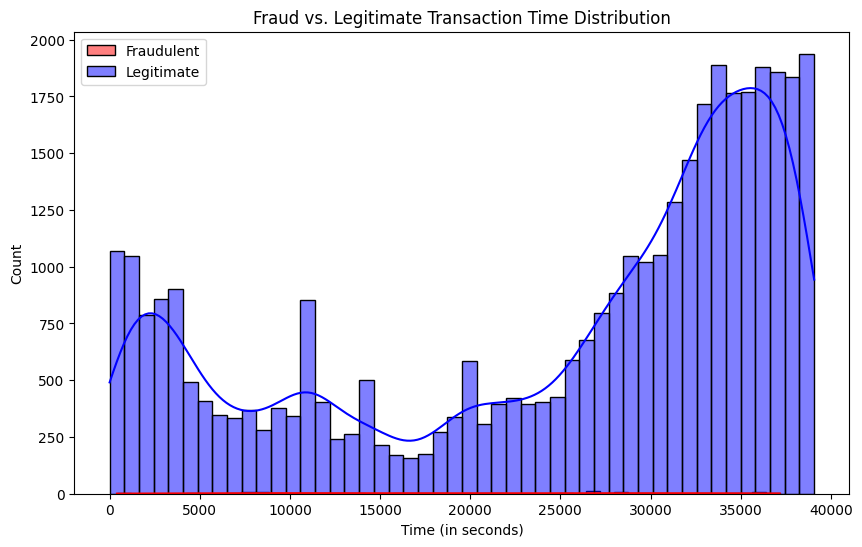

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['Time'], bins=48, kde=True)  # Using 48 bins for a daily view
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')

# Check if there are specific times of day when fraud is more likely to occur
plt.figure(figsize=(10, 6))
sns.histplot(credit_data[credit_data['Class'] == 1]['Time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(credit_data[credit_data['Class'] == 0]['Time'], bins=48, kde=True, color='blue', label='Legitimate')
plt.title('Fraud vs. Legitimate Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.legend()

plt.show()

In [23]:
## Assuming 'credit_data' is your DataFrame
legitimate_transactions = credit_data[credit_data['Class'] == 0]
fraudulent_transactions = credit_data[credit_data['Class'] == 1]

# Calculate summary statistics for both groups
legitimate_summary = legitimate_transactions.describe()
fraudulent_summary = fraudulent_transactions.describe()

print("Summary Statistics for Legitimate Transactions:")
print(legitimate_summary)
print("\nSummary Statistics for Fraudulent Transactions:")
print(fraudulent_summary)

Summary Statistics for Legitimate Transactions:
               Time            V1            V2            V3            V4  \
count  37618.000000  37618.000000  37618.000000  37618.000000  37618.000000   
mean   24778.212797     -0.186787      0.044196      0.749331      0.176750   
std    12531.376600      1.716898      1.493506      1.298146      1.365780   
min        0.000000    -28.344757    -40.978852    -27.747084     -5.172595   
25%    13921.500000     -0.958848     -0.515665      0.244377     -0.718145   
50%    29847.500000     -0.228817      0.104358      0.824898      0.182325   
75%    34943.750000      1.161976      0.741719      1.453821      1.066060   
max    39077.000000      1.960497     14.845545      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  37618.000000  37618.000000  37618.000000  37618.000000  37618.000000   
mean      -0.209569      0.105912     -0.092989      0.025693      0.243321   
std

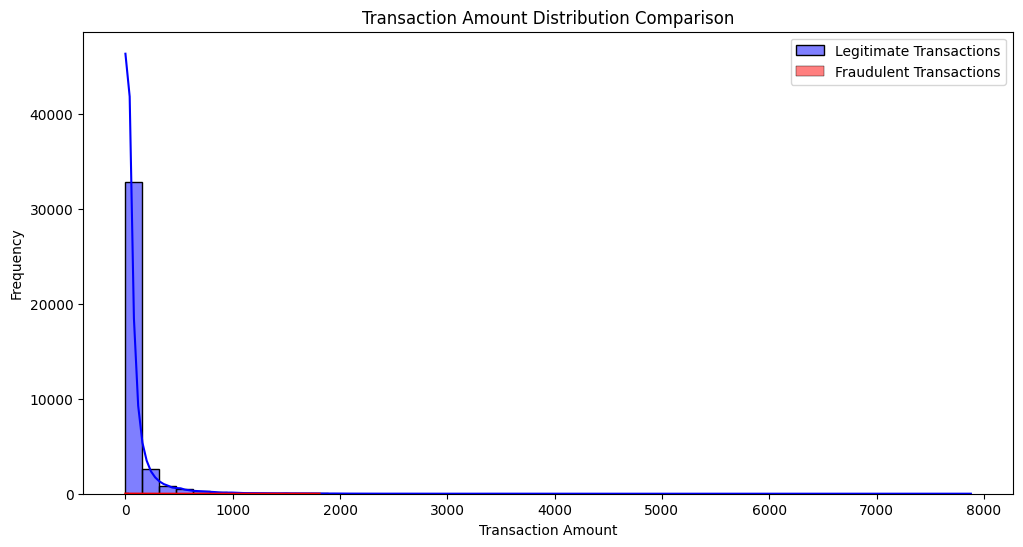

In [24]:
# Separate data for legitimate and fraudulent transactions
legitimate_transactions = credit_data[credit_data['Class'] == 0]['Amount']
fraudulent_transactions = credit_data[credit_data['Class'] == 1]['Amount']

plt.figure(figsize=(12, 6))
sns.histplot(legitimate_transactions, color='blue', kde=True, label='Legitimate Transactions', bins=50)
sns.histplot(fraudulent_transactions, color='red', kde=True, label='Fraudulent Transactions', bins=50)

plt.title('Transaction Amount Distribution Comparison')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [26]:
# Calculate the correlation matrix
correlation_matrix = credit_data.corr()
print(correlation_matrix)



            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.017817 -0.115667 -0.060288 -0.039296 -0.074106 -0.012260   
V1      0.017817  1.000000 -0.111584  0.286233 -0.092395  0.084105  0.097732   
V2     -0.115667 -0.111584  1.000000 -0.223858  0.115026 -0.105633 -0.023214   
V3     -0.060288  0.286233 -0.223858  1.000000 -0.140251  0.292462 -0.005329   
V4     -0.039296 -0.092395  0.115026 -0.140251  1.000000 -0.064532 -0.043252   
V5     -0.074106  0.084105 -0.105633  0.292462 -0.064532  1.000000  0.090833   
V6     -0.012260  0.097732 -0.023214 -0.005329 -0.043252  0.090833  1.000000   
V7     -0.006050  0.152652 -0.052119  0.334333 -0.092966  0.053985  0.089813   
V8      0.039421 -0.086903  0.060928 -0.275757  0.090215 -0.108779 -0.057475   
V9     -0.336237 -0.038683 -0.005773  0.160022 -0.014563  0.041947  0.046951   
V10     0.111361  0.030846 -0.008436  0.191100 -0.093154  0.137374  0.039092   
V11    -0.201689 -0.030263  0.095902 -0.

In [31]:
# Filter the correlations of features with the target variable ('Class')
feature_correlations = correlation_matrix['Class'].drop('Class')
print(feature_correlations)

correlation_threshold = 0.1



Time     -0.017828
V1       -0.216471
V2        0.196077
V3       -0.402231
V4        0.213120
V5       -0.198373
V6       -0.096312
V7       -0.319342
V8        0.163140
V9       -0.135874
V10      -0.307321
V11       0.233989
V12      -0.295519
V13       0.006448
V14      -0.391956
V15      -0.006563
V16      -0.278137
V17      -0.408013
V18      -0.169408
V19       0.032827
V20       0.046539
V21       0.045320
V22      -0.019830
V23      -0.030512
V24      -0.021258
V25       0.019670
V26       0.016414
V27       0.110138
V28       0.017246
Amount    0.000998
Name: Class, dtype: float64


<ipython-input-33-6bfa444c04e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')


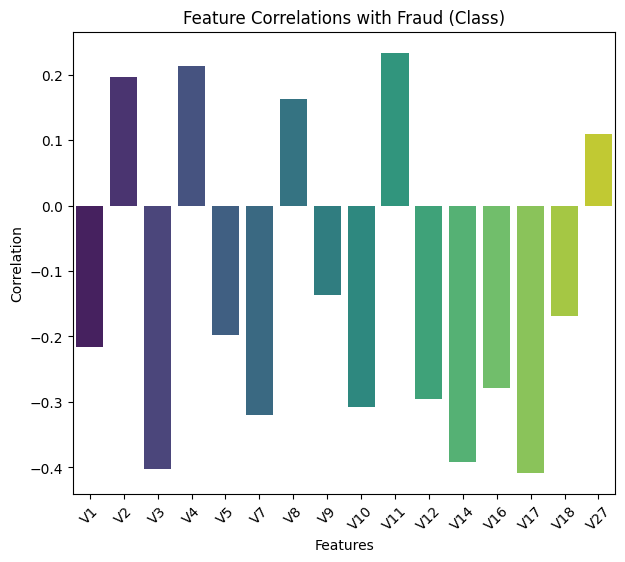

In [33]:
highly_correlated_features = feature_correlations[abs(feature_correlations) > correlation_threshold]

plt.figure(figsize=(7, 6))
sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')
plt.title('Feature Correlations with Fraud (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)

plt.show()

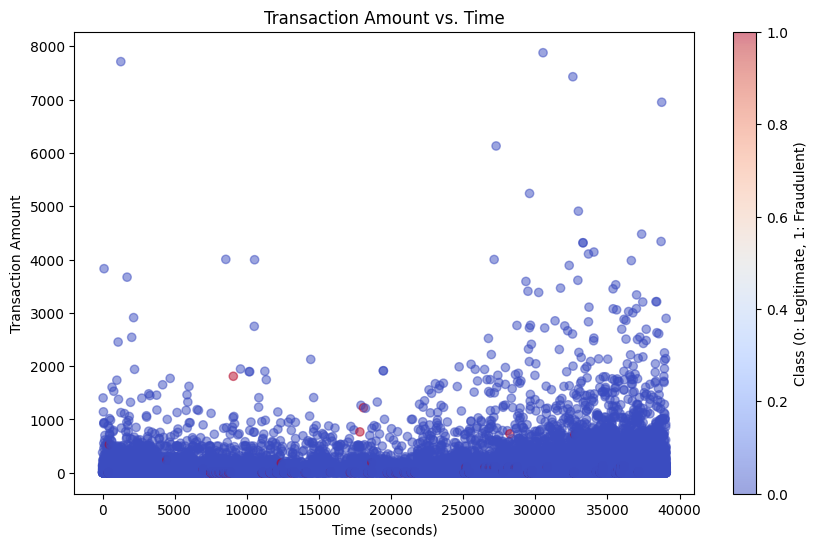

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(credit_data['Time'], credit_data['Amount'], c=credit_data['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class (0: Legitimate, 1: Fraudulent)')

plt.show()

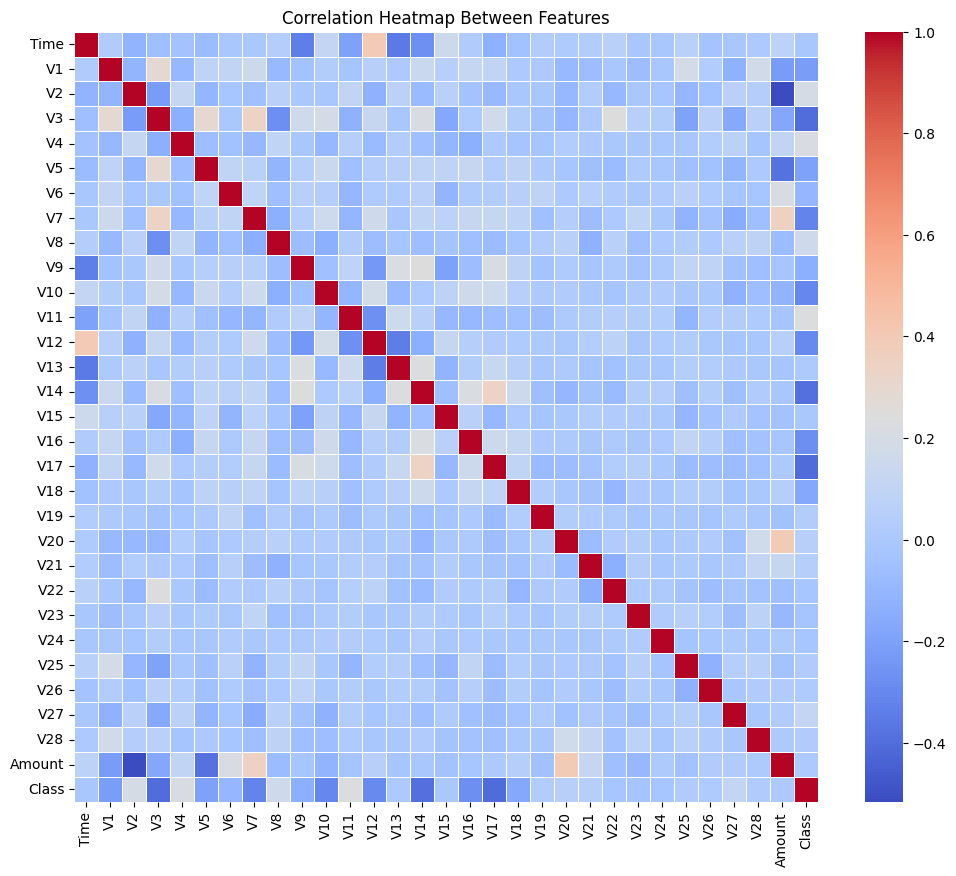

In [35]:
correlation_matrix = credit_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()

In [36]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

In [37]:
# Test value
X = credit_data.drop(['Class'], axis=1)
# Target value
Y = credit_data['Class']

print(f"value and shapes : {X.values,X.shape}")
print(f"value and shapes : {Y.values,Y.shape}")

value and shapes : (array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 3.90760000e+04, -4.74906768e-01,  8.35804077e-01, ...,
         3.10936250e-01,  1.70342146e-01,  1.49000000e+00],
       [ 3.90770000e+04, -2.68278026e+00, -2.02856186e+00, ...,
         2.56990534e-01, -5.85781434e-01,  1.02000000e+02],
       [ 3.90770000e+04,  1.10629205e+00, -5.25726564e-01, ...,
                    nan,             nan,             nan]]), (37722, 30))
value and shapes : (array([ 0.,  0.,  0., ...,  0.,  0., nan]), (37722,))


In [38]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [45]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values

# Test value
X = credit_data.drop(['Class'], axis=1)
# Target value
Y = credit_data['Class']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column
X = imputer.fit_transform(X)

# Handle missing values in the target variable (Y)
imputer_y = SimpleImputer(strategy='most_frequent') # Use most frequent for categorical target
Y = imputer_y.fit_transform(Y.values.reshape(-1, 1))  # Reshape to a 2D array for the imputer
Y = Y.ravel() # Flatten back to 1D array

X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train,Y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)


In [42]:
print(y_pred)
print(Y_test)

[0. 0. 0. ... 0. 0. 0.]
24176    0.0
12332    0.0
277      0.0
31096    0.0
8508     0.0
        ... 
10062    0.0
21501    0.0
30518    0.0
34452    0.0
26333    0.0
Name: Class, Length: 7545, dtype: float64


In [46]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, y_pred))

Confusion Matrix:
 [[7508    1]
 [   8   28]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7509
         1.0       0.97      0.78      0.86        36

    accuracy                           1.00      7545
   macro avg       0.98      0.89      0.93      7545
weighted avg       1.00      1.00      1.00      7545


Accuracy Score: 0.9988071570576541
